In [26]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import Constant
from tqdm import tqdm
import numpy as np
import csv
import pandas as pd
import utils
import os

#-------- 画图设置
# 处理中文乱码
# import matplotlib.font_manager
# matplotlib.font_manager.list_fonts

# plt.title('搞定')
# plt.show()
plt.ion()
plt.rcParams["font.sans-serif"]=['simhei','Times New Roman']
# 英文字体
plt.rcParams["font.family"]=['Times New Roman']
plt.rcParams["font.size"]=16
plt.rcParams["axes.unicode_minus"]=False

In [27]:
values = ['0.1ETH', '1ETH', '10ETH', '100ETH',  
          '100DAI', '1,000DAI', '10,000DAI', '100,000DAI',
          '100USDC', '1,000USDC',
          '100USDT', '1,000USDT',
          '0.1WBTC', '1WBTC', '10WBTC',
          '5,000cDAI', '50,000cDAI', '500,000cDAI', '5,000,000cDAI'
          ]
eth = ['0.1ETH', '1ETH', '10ETH', '100ETH']
token = ['100DAI', '1,000DAI', '10,000DAI', '100,000DAI',
          '100USDC', '1,000USDC',
          '100USDT', '1,000USDT',
          '0.1WBTC', '1WBTC', '10WBTC',
          '5,000cDAI', '50,000cDAI', '500,000cDAI', '5,000,000cDAI']
dai = ['100DAI', '1,000DAI', '10,000DAI', '100,000DAI']
usdc = ['100USDC', '1,000USDC']
usdt = ['100USDT', '1,000USDT']
wbtc = ['0.1WBTC', '1WBTC', '10WBTC']
cDai = ['5,000cDAI', '50,000cDAI', '500,000cDAI', '5,000,000cDAI']
asCnts = [24396,39882,36775,16936,
            306,883,2292,1801,
            208,607,
            457,723,
            109,251,301,
            5,17,24,43]

path = Constant.resultPath
type = ['heuristic','mode','mine']
res_dir = 'deanonymity_result.csv'
print(path+res_dir)
if os.path.exists(path+res_dir):
    print("exist")
    cntdf = utils.readCsvFile(path+res_dir,0)
else:
    print("no exist")
    cntdf = pd.DataFrame(index = values)

Result/deanonymity_result.csv
exist


In [28]:
print(cntdf)

                 Set  U_rule1  De-ASet_rule1  U_rule2  De-ASet_rule2  U_rule3   
0.1ETH         24396     4272           9446     4274           9491     4313  \
1ETH           39882     5737          16878     5700          16989     5661   
10ETH          36775     4674          14520     4639          14622     4601   
100ETH         16936     1312           4836     1299           4906     1313   
100DAI           306       34             63       36             66       36   
1,000DAI         883       71            143       72            145       75   
10,000DAI       2292      191            414      193            418      209   
100,000DAI      1801      113            254      114            257      121   
100USDC          208       41             76       41             76       41   
1,000USDC        607      107            209      108            210      109   
100USDT          457       82            151       82            152       83   
1,000USDT        723      10

In [29]:


resdf = cntdf[['Set','U-Heuristic','De-ASet-Heuristic','U_rule5','De-ASet_rule5','U_rule6','De-ASet_rule6','U-mode','De-ASet-mode','U_fp','De-ASet_fp','U_mine','De-ASet_mine']]
resdf['Heuristic'] = resdf['Set'] - resdf['De-ASet-Heuristic'] + resdf['U-Heuristic']
resdf['Mode'] = resdf['Set'] - resdf['De-ASet-mode'] + resdf['U-mode']
resdf['FP'] = resdf['Set'] - resdf['De-ASet_fp'] + resdf['U_fp']
resdf['Mine'] =resdf['Set'] - resdf['De-ASet_mine'] + resdf['U_mine']
resdf['Heuristic-per'] = (resdf['Set']-resdf['Heuristic'])/resdf['Set']*100
resdf['Mine-per'] = (resdf['Heuristic']-resdf['Mine'])/resdf['Set']*100
resdf['res-per'] = resdf['Mine']/resdf['Set']*100

perdf = resdf[['res-per','Mine-per','Heuristic-per']]
figdf = resdf[['Set','Heuristic','Mode','FP','Mine']]
figdf.rename(columns={"Set":"原始匿名集大小","Heuristic":"应用行为分析启发式规则后的匿名集大小","Mode":"应用表层关联挖掘后的匿名集大小","FP":"应用深层关联挖掘后的匿名集大小","Mine":"应用关联挖掘技术的匿名集大小"},inplace=True)
perdf.rename(columns={"res-per":"未关联匿名集",'Mine-per':'本文关联挖掘优化','Heuristic-per':"本文行为分析启发式规则"},inplace=True)
colorbox = ['#c82423','#f8ac8c','#2878b5','#8fbc8f','#e6cfe6']
hatchbox =['','','/////','','.....']
plt.rcParams["font.size"]=18
alp = 0.6



C:\Users\Tangy\AppData\Local\Temp\ipykernel_33788\3688784922.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resdf['Heuristic'] = resdf['Set'] - resdf['De-ASet-Heuristic'] + resdf['U-Heuristic']
C:\Users\Tangy\AppData\Local\Temp\ipykernel_33788\3688784922.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resdf['Mode'] = resdf['Set'] - resdf['De-ASet-mode'] + resdf['U-mode']
C:\Users\Tangy\AppData\Local\Temp\ipykernel_33788\3688784922.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy

3
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


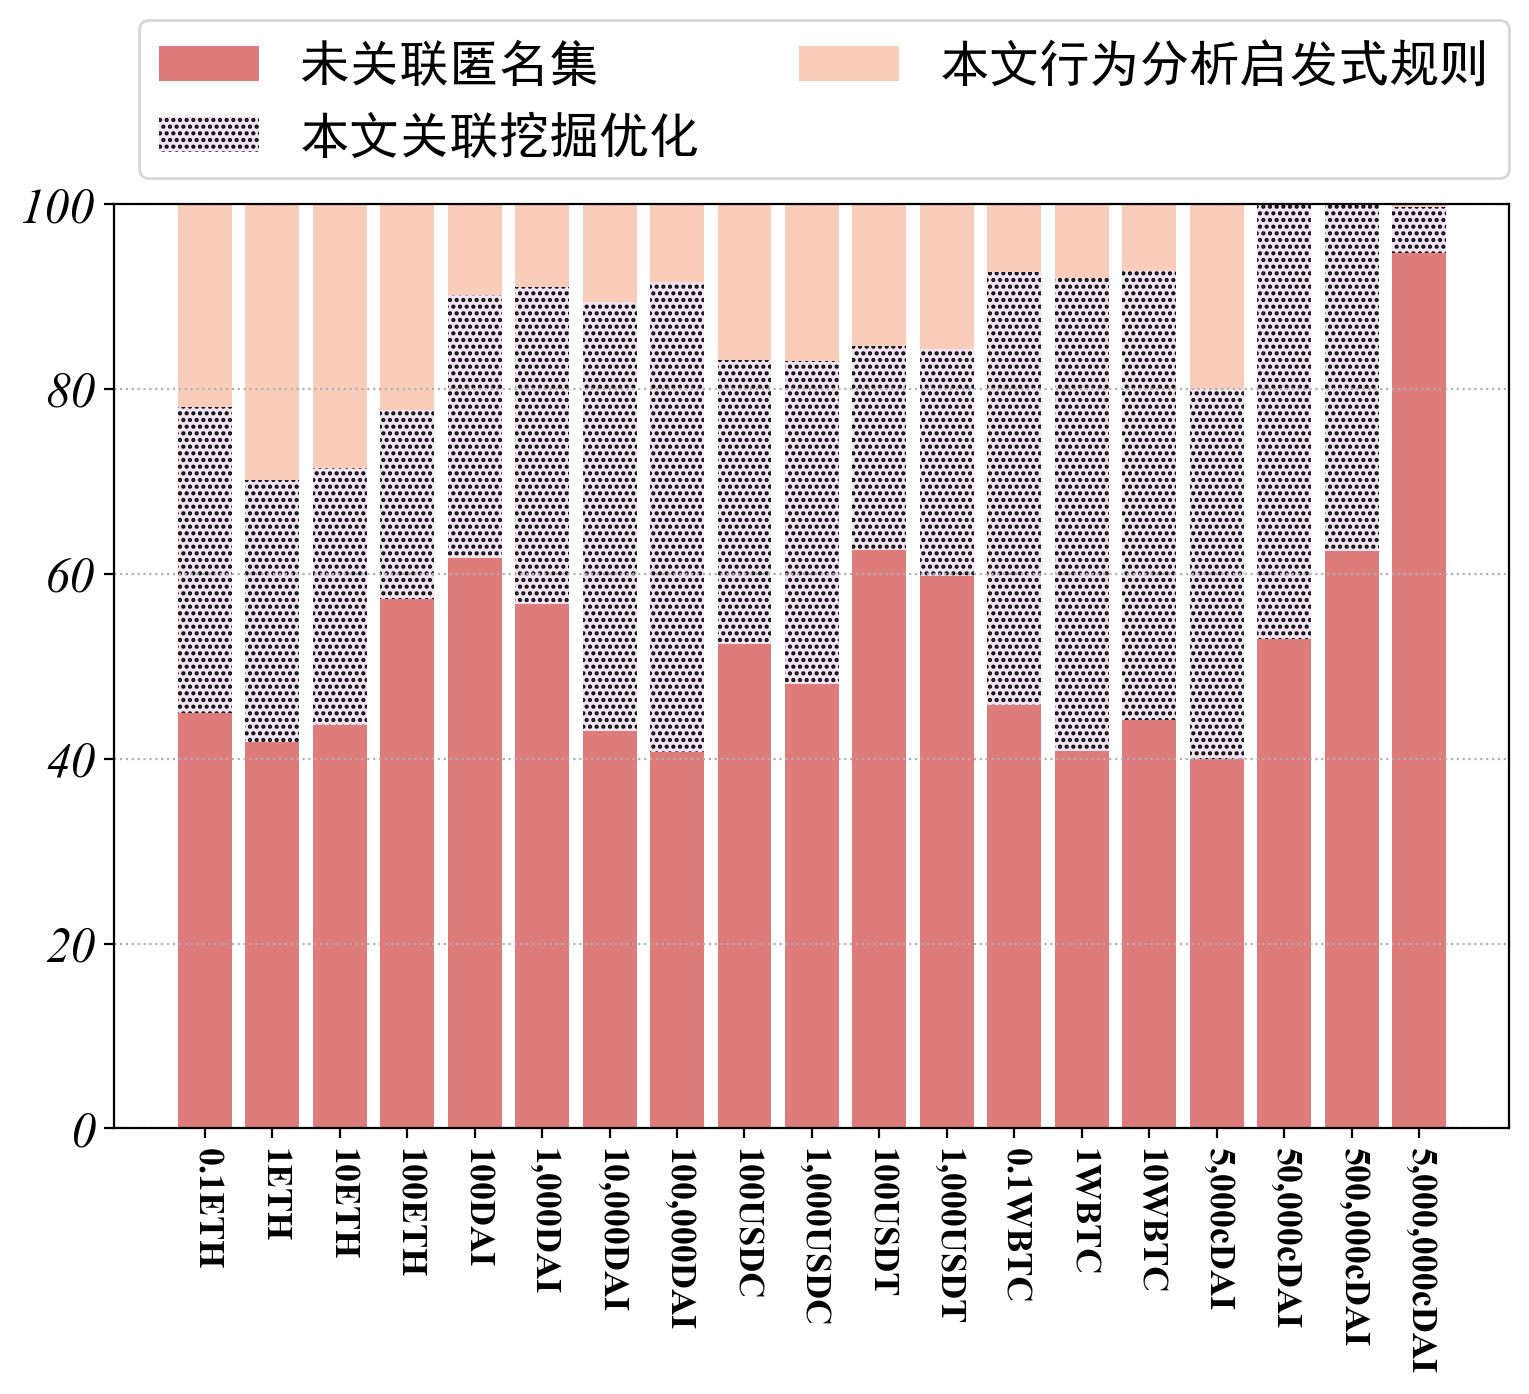

In [45]:
plt.figure(figsize=(9,6), dpi=200)
#计算有多少个列
len_col = len(perdf.count())
print(len_col)
#计算有多少行, 并生成一个步进为1的数组
index = np.arange(len(perdf.index))
print(index)
#设置每组总宽度
total_width= 1.2
#求出每组每列宽度
width = total_width/len_col
#对每个字段进行遍历
colorbox_per = ['#c82423','#e6cfe6','#f8ac8c','#2878b5','#8fbc8f',]
hatchbox_per =['','.....','','/////','']
bottom = 0
for i in range(len_col):
    #得出每个字段的名称
    het = perdf.columns[i]
    #求出每个字段所包含的数组, 也就是对应的高度
    y_values = perdf[het]
    #设置x轴标签
    x_tables = index * 1.5
    #绘制柱形图
    plt.bar(x_tables, y_values,bottom = bottom, width =total_width, color = colorbox_per[i], alpha=alp, hatch=hatchbox_per[i])
    bottom += y_values
#设置x轴刻度标签位置
index1 = index * 1.5
#通过xticks设置x轴标签为df_gbsp的索引
plt.xticks(index1 , perdf.index,fontweight='bold',rotation=270,fontsize=13)
plt.yticks(fontstyle='italic')
#添加图例
plt.legend(perdf.columns,loc='upper right',bbox_to_anchor=(1,1.2),borderaxespad = 0.,ncol=2,prop={"family":'simhei',"size":18})
#网格线
plt.grid(axis='y',linestyle=':')

ax = plt.gca()
ax.set_yticks(np.arange(0,120,20),labels=np.arange(0,120,20))
#边框不可见
# ax.spines.right.set_visible(False) 
# ax.spines.top.set_visible(False)
plt.show()


[]


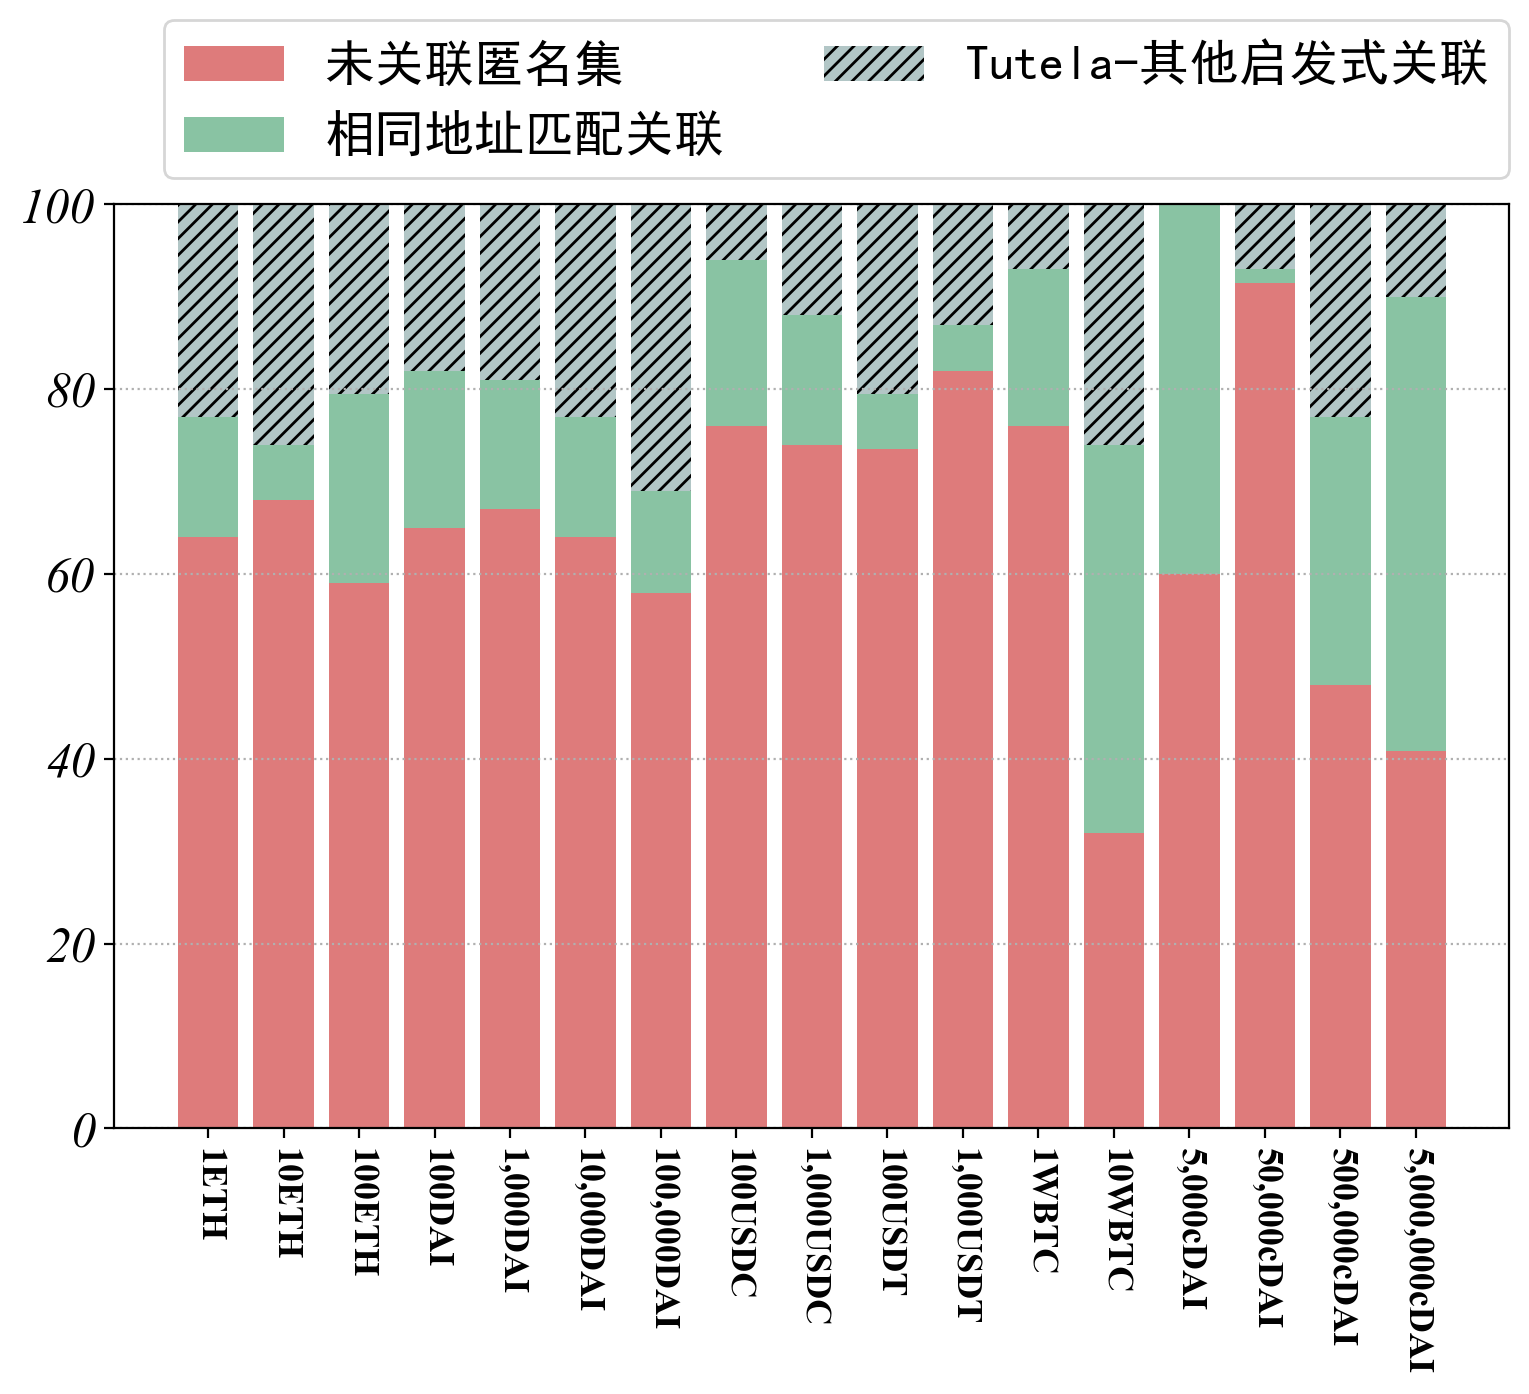

In [44]:
plt.figure(figsize=(9,6), dpi=200)

resdf = [
    [64, 68,   59,  65,  67,  64, 58, 76, 74, 73.5, 82, 76, 32, 60, 91.5, 48, 40.8],
    [13, 6,  20.5,  17,  14,  13, 11, 18, 14,  6,    5,   17, 42, 40, 1.5, 29, 49.2],
    [23, 26, 20.5, 18,  19,  23,  31, 6, 12, 20.5, 13,  7,   26, 0, 7, 23, 10]
]

col = [ '1ETH', '10ETH', '100ETH',  
          '100DAI', '1,000DAI', '10,000DAI', '100,000DAI',
          '100USDC', '1,000USDC',
          '100USDT', '1,000USDT',
          '1WBTC', '10WBTC',
          '5,000cDAI', '50,000cDAI', '500,000cDAI', '5,000,000cDAI']

cag = ['未关联匿名集','相同地址匹配关联','Tutela-其他启发式关联']

#计算有多少列 并生成一个步进为1的数组
index = np.arange(len(col))
#设置每组总宽度
total_width= 1.2
# #求出每组每列宽度
# width = total_width/len_col
#对每个字段进行遍历
colorbox_per = ['#c82423','#3B9B66','#7FA0A0','#e6cfe6','#f8ac8c','#2878b5','#8fbc8f',]
hatchbox_per =['','','////','']
bottom = [0]*len(col)
for i in range(len(cag)):
    #求出每个字段所包含的数组, 也就是对应的高度
    y_values = resdf[i]
    #设置x轴标签
    x_tables = index * 1.5
    #绘制柱形图
    plt.bar(x_tables, y_values,bottom = bottom, width =total_width, color = colorbox_per[i], alpha=alp, hatch=hatchbox_per[i])
    bottom  = list(map(lambda x, y: x+y, bottom, y_values))
#设置x轴刻度标签位置
index1 = index * 1.5
#通过xticks设置x轴标签为df_gbsp的索引
plt.xticks(index1 , col, fontweight='bold',rotation=270,fontsize=13)
plt.yticks(fontstyle='italic')
#添加图例
order = [2,1,0]
plt.legend(cag,loc='upper right',bbox_to_anchor=(1,1.2),borderaxespad = 0.,ncol=2,prop={"family":'simhei',"size":18})
handles, labels = plt.gca().get_legend_handles_labels()
print(handles)
#网格线
plt.grid(axis='y',linestyle=':')
ax = plt.gca()
ax.set_yticks(np.arange(0,120,20),labels=np.arange(0,120,20))
#边框不可见
# ax.spines.right.set_visible(False) 
# ax.spines.top.set_visible(False)
plt.show()

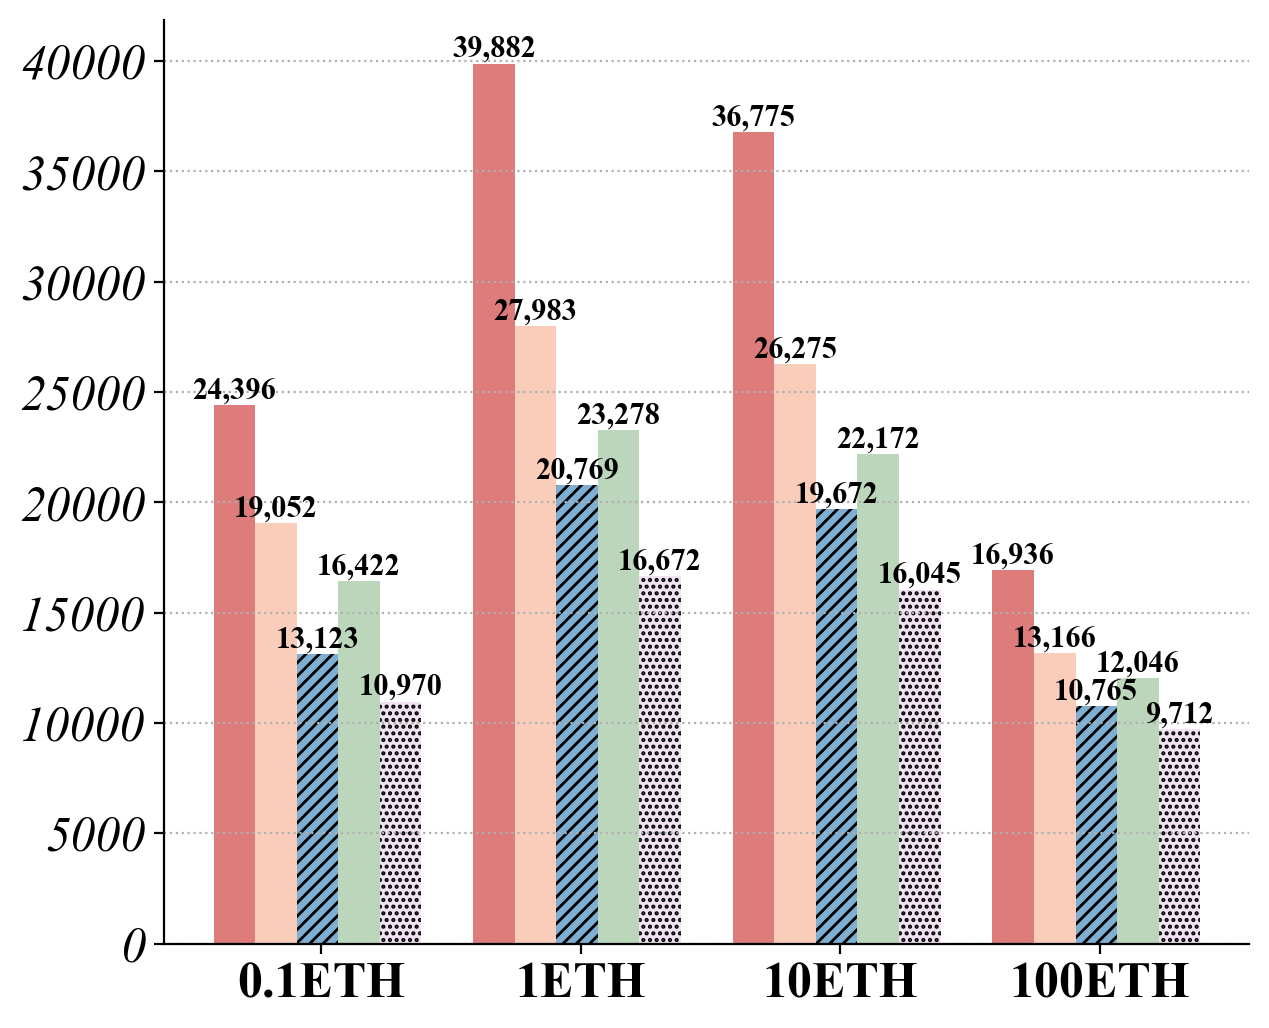

In [32]:
plt.figure(figsize=(7,6), dpi=200)
ethdf = figdf.loc[eth]

#计算有多少个列
len_spe = len(ethdf.count())
#计算有多少行, 并生成一个步进为1的数组
index = np.arange(len(ethdf.index))
#设置每组总宽度
total_width= 1.2
#求出每组每列宽度
width = total_width/len_spe
#对每个字段进行遍历
for i in range(len_spe):
    #得出每个字段的名称
    het = ethdf.columns[i]
    #求出每个字段所包含的数组, 也就是对应的高度
    y_values = ethdf[het]
    #设置x轴标签
    x_tables = index * 1.5 + i*width
    #绘制柱形图
    plt.bar(x_tables, y_values, width =width, color = colorbox[i], alpha=alp, hatch=hatchbox[i])
    #通过zip接收(x_tables,y_values),返回一个可迭代对象, 每一个元素都是由(x_tables,y_values)组成的元组.
    for x, y in zip(x_tables, y_values):
    #通过text()方法设置数据标签, 位于柱形中心, 最顶部, 字体大小为10.5
        plt.text(x, y ,'{:,.0f}'.format(y) ,ha='center', va='bottom', fontsize=11, fontweight='demibold')
#设置x轴刻度标签位置
index1 = index * 1.5 + 1/2
#通过xticks设置x轴标签为df_gbsp的索引
plt.xticks(index1 , ethdf.index,fontweight='bold')
plt.yticks(fontstyle='italic')
#添加图例
# plt.legend(ethdf.columns,fontsize=12,loc='upper right')
#网格线
plt.grid(axis='y',linestyle=':')

ax = plt.gca()
#边框不可见
ax.spines.right.set_visible(False) 
ax.spines.top.set_visible(False)
plt.show()


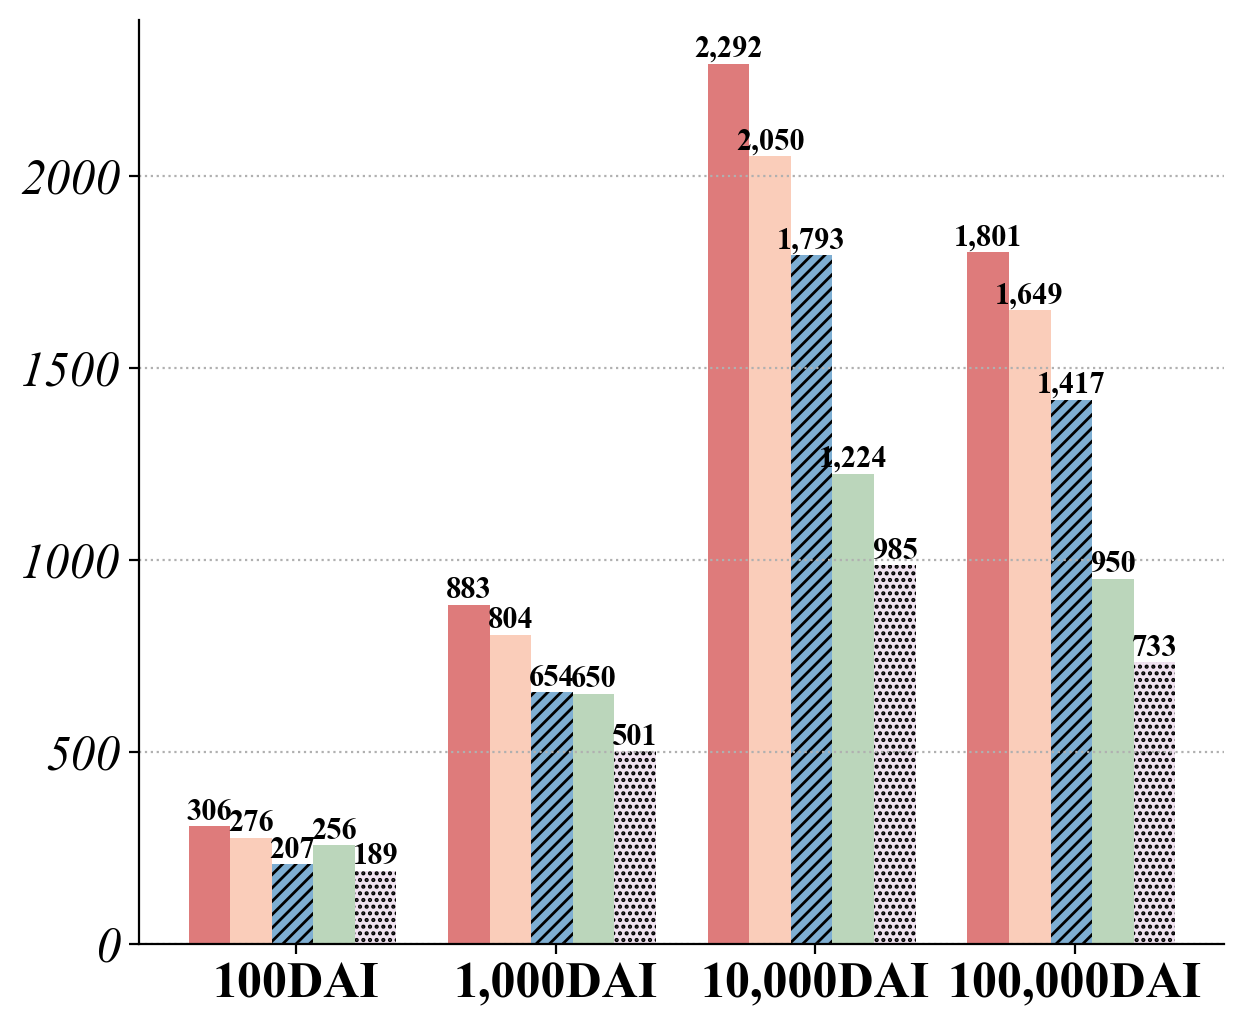

In [33]:
plt.figure(figsize=(7,6), dpi=200)
df = figdf.loc[dai]

#计算有多少个列
len_spe = len(df.count())
#计算有多少行, 并生成一个步进为1的数组
index = np.arange(len(df.index))
#设置每组总宽度
total_width= 1.2
#求出每组每列宽度
width = total_width/len_spe
#对每个字段进行遍历
for i in range(len_spe):
    #得出每个字段的名称
    het = df.columns[i]
    #求出每个字段所包含的数组, 也就是对应的高度
    y_values = df[het]
    #设置x轴标签
    x_tables = index * 1.5 + i*width
    #绘制柱形图
    plt.bar(x_tables, y_values, width =width, color = colorbox[i], alpha=0.6, hatch=hatchbox[i])
    #通过zip接收(x_tables,y_values),返回一个可迭代对象, 每一个元素都是由(x_tables,y_values)组成的元组.
    for x, y in zip(x_tables, y_values):
    #通过text()方法设置数据标签, 位于柱形中心, 最顶部, 字体大小为10.5
        plt.text(x, y ,'{:,.0f}'.format(y) ,ha='center', va='bottom', fontsize=11, fontweight='demibold')
#设置x轴刻度标签位置
index1 = index * 1.5 + 1/2
#通过xticks设置x轴标签为df_gbsp的索引
plt.xticks(index1 , df.index, fontweight='bold')
plt.yticks(fontstyle='italic')
#添加图例
# plt.legend(df.columns,fontsize=12,loc='upper left')
#网格线
plt.grid(axis='y',linestyle=':')

ax = plt.gca()
#边框不可见
ax.spines.right.set_visible(False) 
ax.spines.top.set_visible(False)
plt.show()


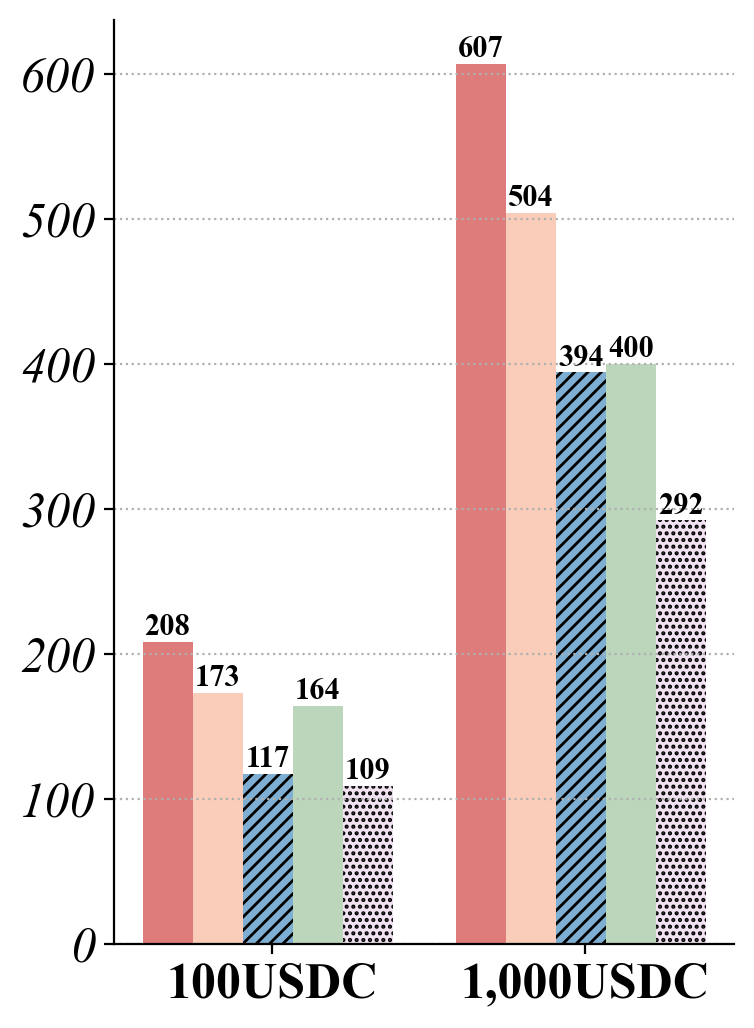

In [34]:
plt.figure(figsize=(4,6), dpi=200)
df = figdf.loc[usdc]

#计算有多少个列
len_spe = len(df.count())
#计算有多少行, 并生成一个步进为1的数组
index = np.arange(len(df.index))
#设置每组总宽度
total_width= 1.2
#求出每组每列宽度
width = total_width/len_spe
#对每个字段进行遍历
for i in range(len_spe):
    #得出每个字段的名称
    het = df.columns[i]
    #求出每个字段所包含的数组, 也就是对应的高度
    y_values = df[het]
    #设置x轴标签
    x_tables = index * 1.5 + i*width
    #绘制柱形图
    plt.bar(x_tables, y_values, width =width, color = colorbox[i], alpha=alp, hatch=hatchbox[i])
    #通过zip接收(x_tables,y_values),返回一个可迭代对象, 每一个元素都是由(x_tables,y_values)组成的元组.
    for x, y in zip(x_tables, y_values):
    #通过text()方法设置数据标签, 位于柱形中心, 最顶部, 字体大小为10.5
        plt.text(x, y ,'{:,.0f}'.format(y) ,ha='center', va='bottom', fontsize=11, fontweight='demibold')
#设置x轴刻度标签位置
index1 = index * 1.5 + 1/2
#通过xticks设置x轴标签为df_gbsp的索引
plt.xticks(index1 , df.index, fontweight='bold')
plt.yticks(fontstyle='italic')
#添加图例
# plt.legend(df.columns,fontsize=9,loc='upper left')
#网格线
plt.grid(axis='y',linestyle=':')

ax = plt.gca()
#边框不可见
ax.spines.right.set_visible(False) 
ax.spines.top.set_visible(False)
plt.show()


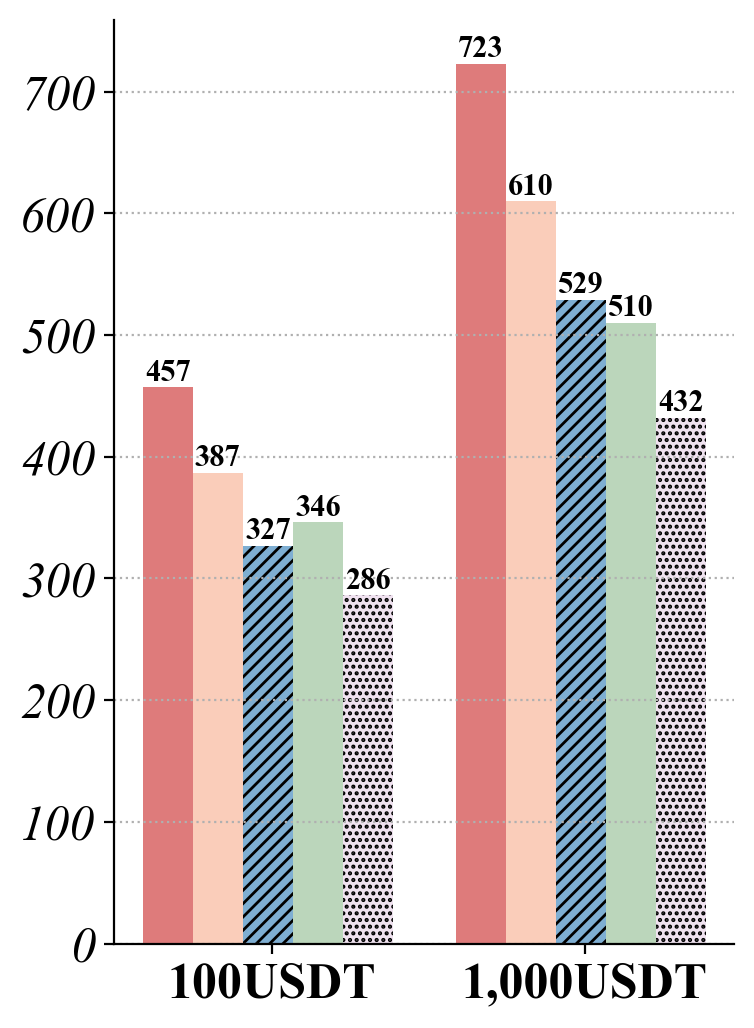

In [35]:
plt.figure(figsize=(4,6), dpi=200)
df = figdf.loc[usdt]

#计算有多少个列
len_spe = len(df.count())
#计算有多少行, 并生成一个步进为1的数组
index = np.arange(len(df.index))
#设置每组总宽度
total_width= 1.2
#求出每组每列宽度
width = total_width/len_spe
#对每个字段进行遍历
for i in range(len_spe):
    #得出每个字段的名称
    het = df.columns[i]
    #求出每个字段所包含的数组, 也就是对应的高度
    y_values = df[het]
    #设置x轴标签
    x_tables = index * 1.5 + i*width
    #绘制柱形图
    plt.bar(x_tables, y_values, width =width, color = colorbox[i], alpha=alp, hatch=hatchbox[i])
    #通过zip接收(x_tables,y_values),返回一个可迭代对象, 每一个元素都是由(x_tables,y_values)组成的元组.
    for x, y in zip(x_tables, y_values):
    #通过text()方法设置数据标签, 位于柱形中心, 最顶部, 字体大小为10.5
        plt.text(x, y ,'{:,.0f}'.format(y) ,ha='center', va='bottom', fontsize=11, fontweight='demibold')
#设置x轴刻度标签位置
index1 = index * 1.5 + 1/2
#通过xticks设置x轴标签为df_gbsp的索引
plt.xticks(index1 , df.index, fontweight='bold')
plt.yticks(fontstyle='italic')
#添加图例
# plt.legend(df.columns,fontsize=9,loc='upper left')
#网格线
plt.grid(axis='y',linestyle=':')

ax = plt.gca()
#边框不可见
ax.spines.right.set_visible(False) 
ax.spines.top.set_visible(False)
plt.show()


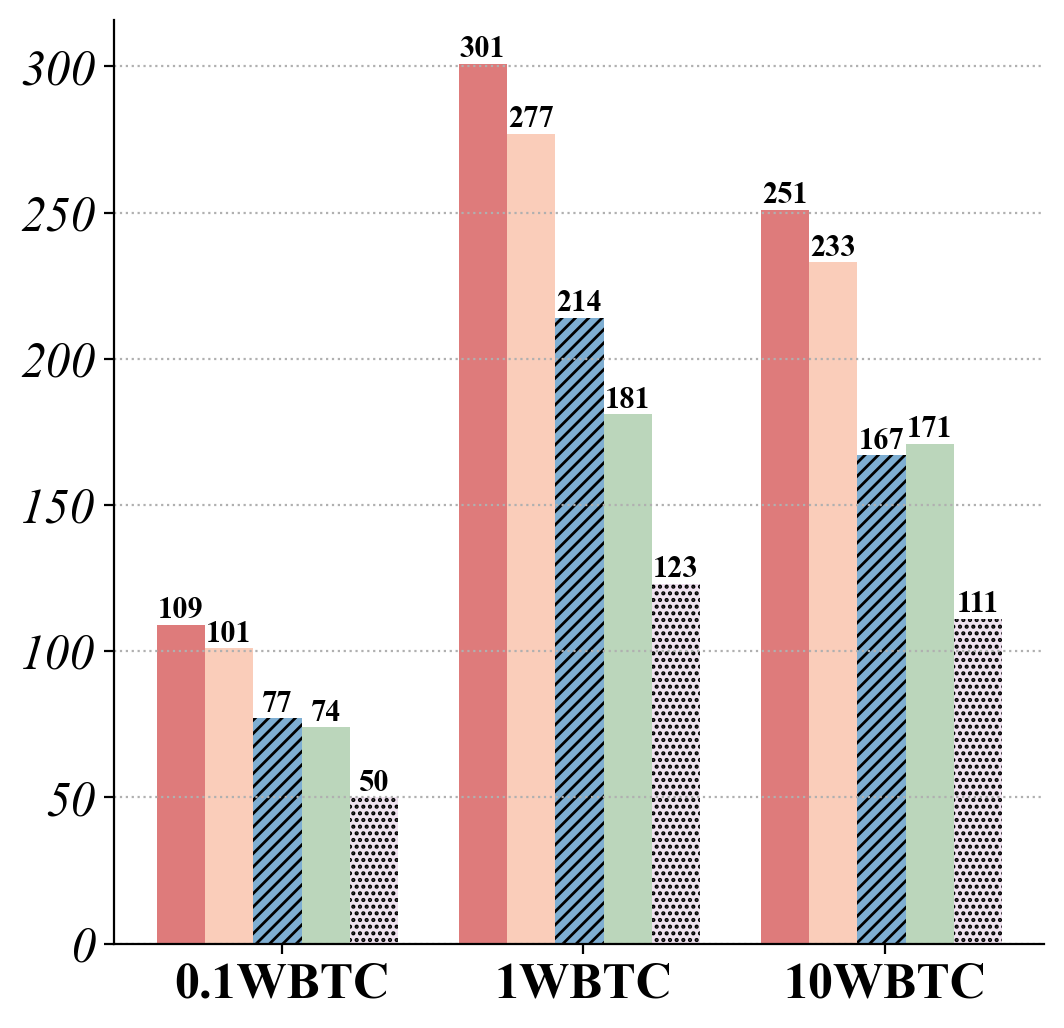

In [36]:
plt.figure(figsize=(6,6), dpi=200)
df = figdf.loc[wbtc]

#计算有多少个列
len_spe = len(df.count())
#计算有多少行, 并生成一个步进为1的数组
index = np.arange(len(df.index))
#设置每组总宽度
total_width= 1.2
#求出每组每列宽度
width = total_width/len_spe
#对每个字段进行遍历
for i in range(len_spe):
    #得出每个字段的名称
    het = df.columns[i]
    #求出每个字段所包含的数组, 也就是对应的高度
    y_values = df[het]
    #设置x轴标签
    x_tables = index * 1.5 + i*width
    #绘制柱形图
    plt.bar(x_tables, y_values, width =width, color = colorbox[i], alpha=alp, hatch=hatchbox[i])
    #通过zip接收(x_tables,y_values),返回一个可迭代对象, 每一个元素都是由(x_tables,y_values)组成的元组.
    for x, y in zip(x_tables, y_values):
    #通过text()方法设置数据标签, 位于柱形中心, 最顶部, 字体大小为10.5
        plt.text(x, y ,'{:,.0f}'.format(y) ,ha='center', va='bottom', fontsize=11, fontweight='demibold')
#设置x轴刻度标签位置
index1 = index * 1.5 + 1/2
#通过xticks设置x轴标签为df_gbsp的索引
plt.xticks(index1 , df.index, fontweight='bold')
plt.yticks(fontstyle='italic')
#添加图例
# plt.legend(df.columns,fontsize=9,loc='upper left')
#网格线
plt.grid(axis='y',linestyle=':')

ax = plt.gca()
#边框不可见
ax.spines.right.set_visible(False) 
ax.spines.top.set_visible(False)
plt.show()


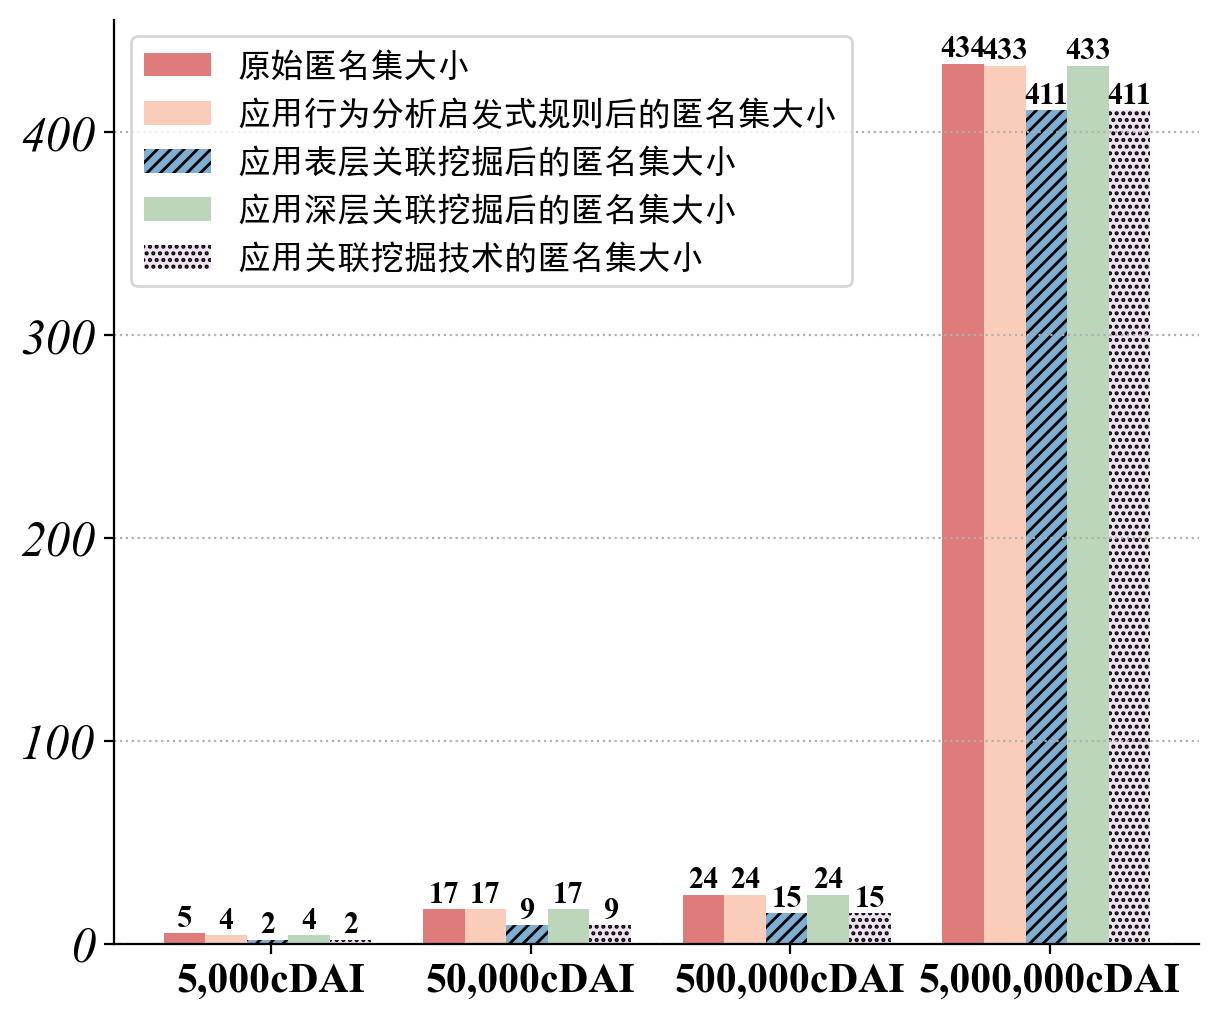

In [37]:
plt.figure(figsize=(7,6), dpi=200)
df = figdf.loc[cDai]

#计算有多少个列
len_spe = len(df.count())
#计算有多少行, 并生成一个步进为1的数组
index = np.arange(len(df.index))
#设置每组总宽度
total_width= 1.2
#求出每组每列宽度
width = total_width/len_spe
#对每个字段进行遍历
for i in range(len_spe):
    #得出每个字段的名称
    het = df.columns[i]
    #求出每个字段所包含的数组, 也就是对应的高度
    y_values = df[het]
    #设置x轴标签
    x_tables = index * 1.5 + i*width
    #绘制柱形图
    plt.bar(x_tables, y_values, width =width, color = colorbox[i], alpha=alp, hatch=hatchbox[i])
    #通过zip接收(x_tables,y_values),返回一个可迭代对象, 每一个元素都是由(x_tables,y_values)组成的元组.
    for x, y in zip(x_tables, y_values):
    #通过text()方法设置数据标签, 位于柱形中心, 最顶部, 字体大小为10.5
        plt.text(x, y ,'{:,.0f}'.format(y) ,ha='center', va='bottom', fontsize=11, fontweight='demibold')
#设置x轴刻度标签位置
index1 = index * 1.5 + 1/2
#通过xticks设置x轴标签为df_gbsp的索引
plt.xticks(index1 , df.index,fontweight='bold',fontsize=15)
plt.yticks(fontstyle='italic')
#添加图例
plt.legend(df.columns,loc='upper left',prop={"family":'simhei',"size":12})
#网格线
plt.grid(axis='y',linestyle=':')

ax = plt.gca()
#边框不可见
ax.spines.right.set_visible(False) 
ax.spines.top.set_visible(False)
plt.show()


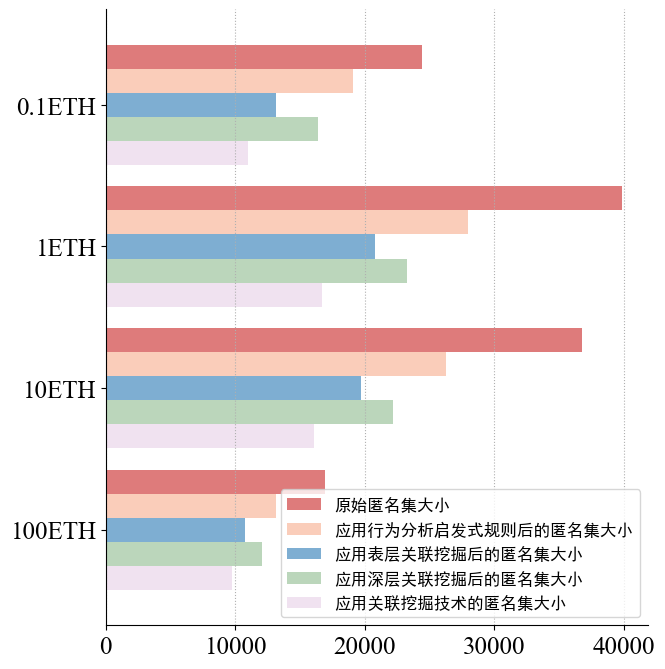

In [38]:
ethdf = figdf.loc[eth]

bars = ethdf.plot.barh(figsize=(7,8), color=colorbox, alpha=0.6, width=0.85)
# hatch_map = ['','','/','&','']
# for bar,mark in zip(bars,hatch_map):
#     bar.set_hatch(mark)
#网格线
plt.grid(axis='x',linestyle=':')

ax = plt.gca()
plt.legend(loc='lower right',prop={"family":'simhei',"size":12})
#边框不可见
ax.spines.right.set_visible(False) 
ax.spines.top.set_visible(False)
#翻转
ax.invert_yaxis()
plt.show()